In [122]:
#computation
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
from scipy import stats
import statsmodels.api as sm

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

#modelling
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, f1_score
from sklearn.calibration  import CalibratedClassifierCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import chi2, SelectKBest

In [123]:
#read the data
df = pd.read_csv('training_set.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3910 non-null   int64  
 1   X1          3910 non-null   float64
 2   X2          3910 non-null   float64
 3   X3          3910 non-null   float64
 4   X4          3910 non-null   float64
 5   X5          3910 non-null   float64
 6   X6          3910 non-null   float64
 7   X7          3910 non-null   float64
 8   X8          3910 non-null   float64
 9   X9          3910 non-null   float64
 10  X10         3910 non-null   float64
 11  X11         3910 non-null   float64
 12  X12         3910 non-null   float64
 13  X13         3910 non-null   float64
 14  X14         3910 non-null   float64
 15  X15         3910 non-null   float64
 16  X16         3910 non-null   float64
 17  X17         3910 non-null   float64
 18  X18         3910 non-null   float64
 19  X19         3910 non-null  

In [125]:
#independent variables
features = df.columns[1:58]
#dependent variable/class labels
class_label = df['Y']

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


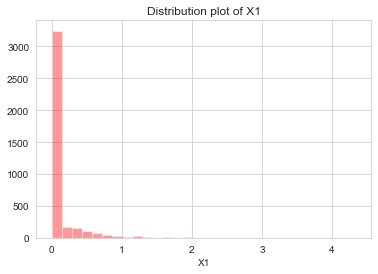

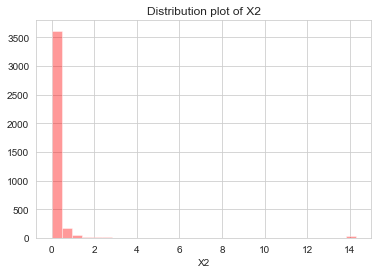

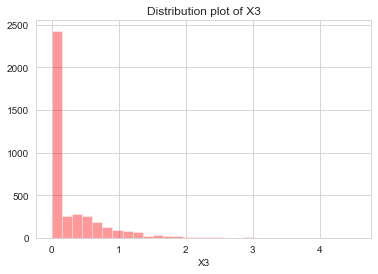

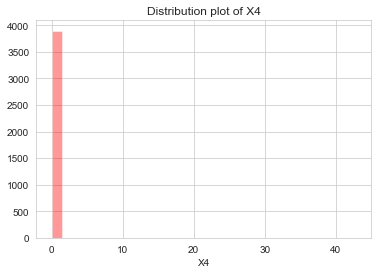

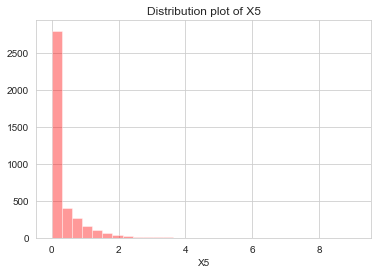

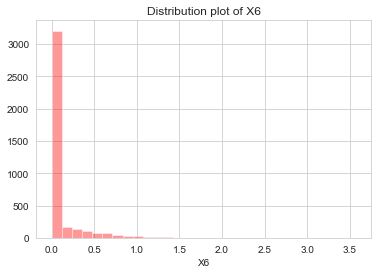

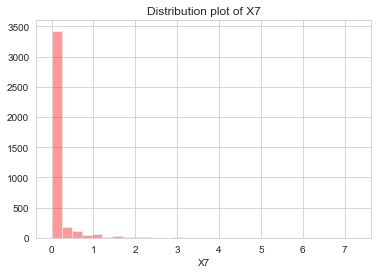

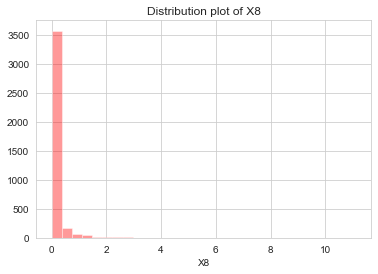

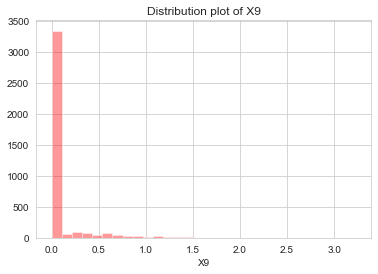

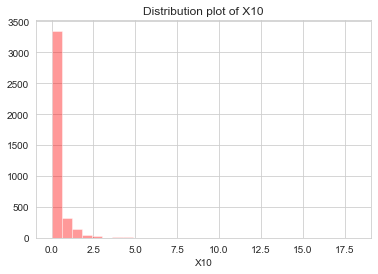

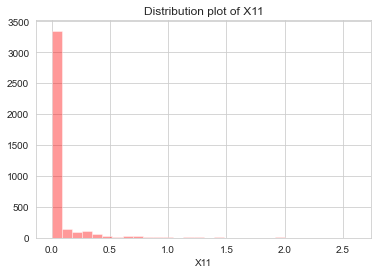

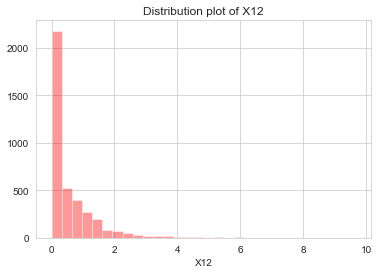

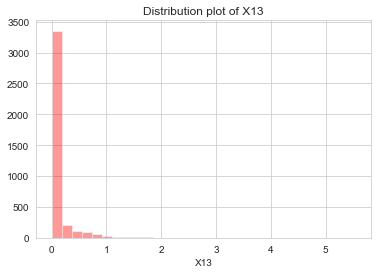

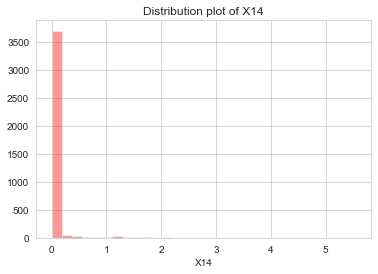

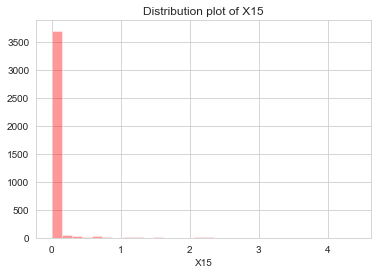

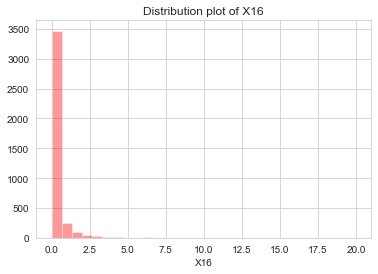

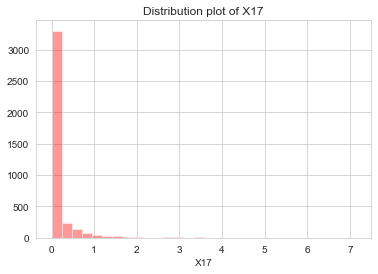

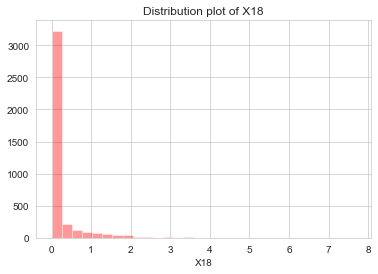

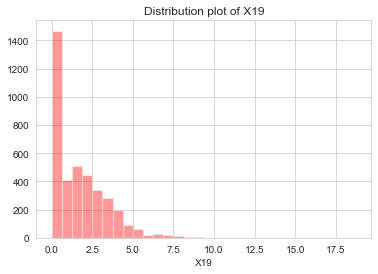

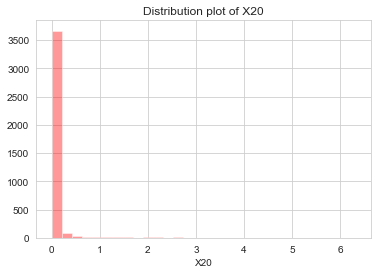

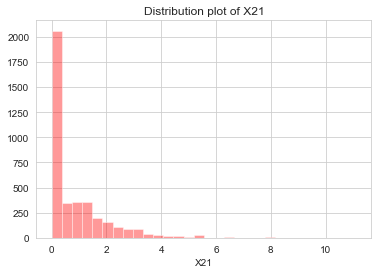

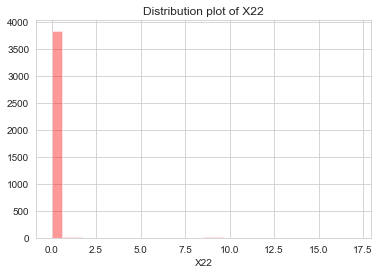

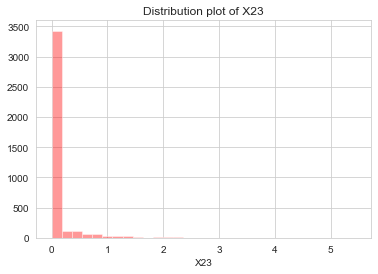

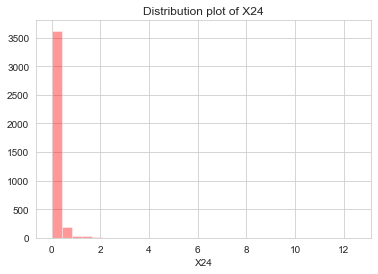

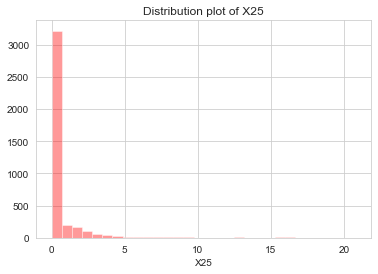

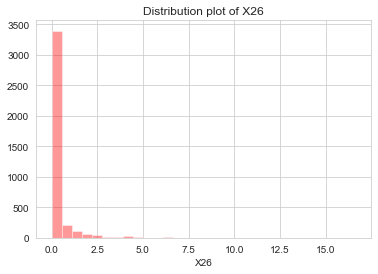

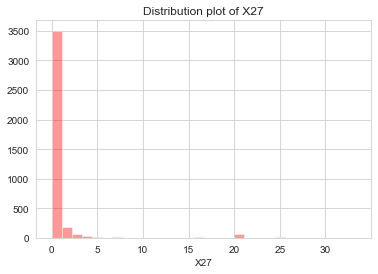

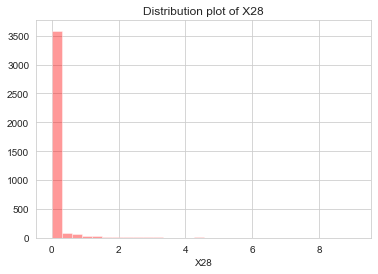

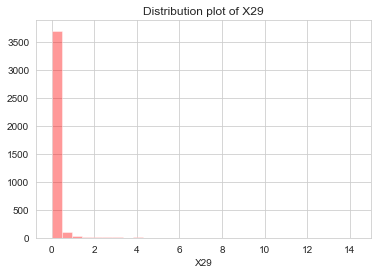

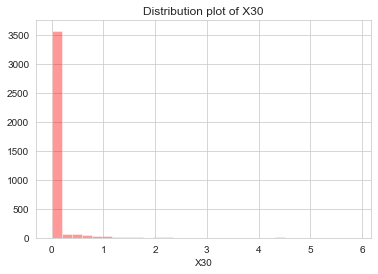

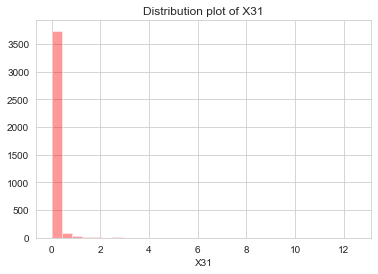

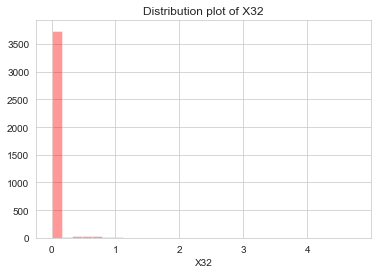

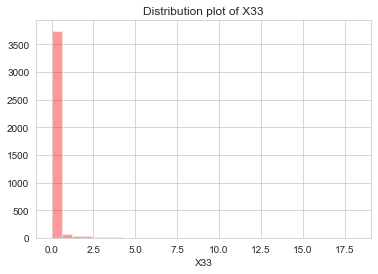

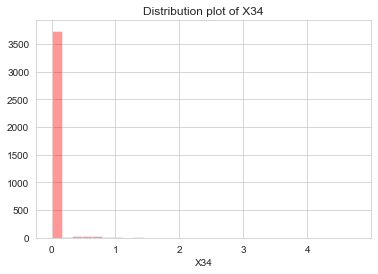

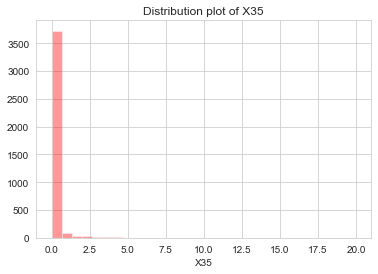

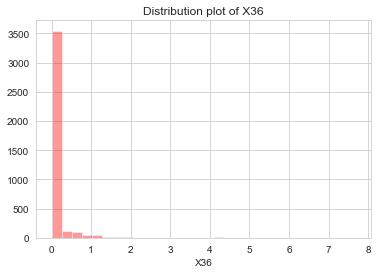

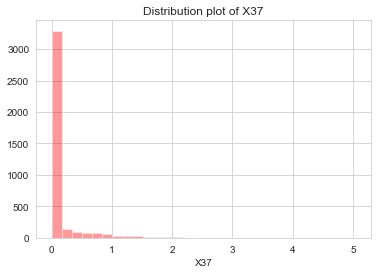

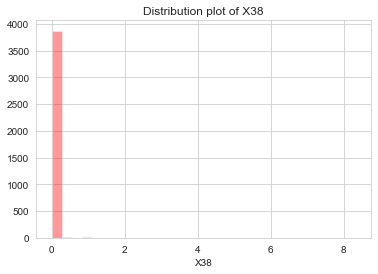

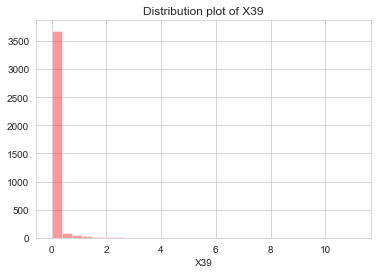

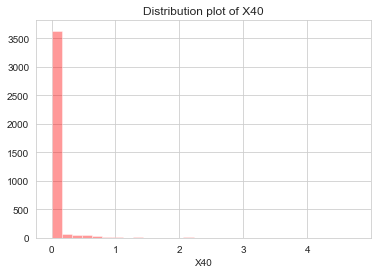

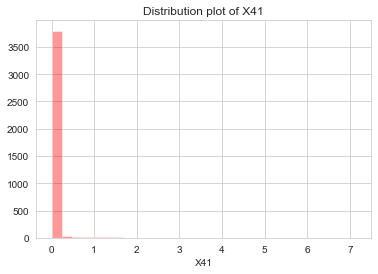

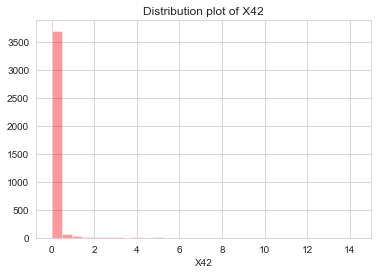

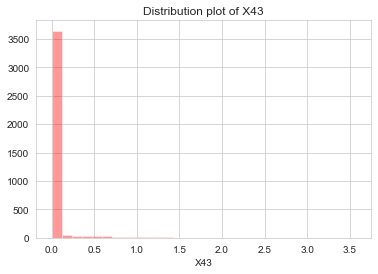

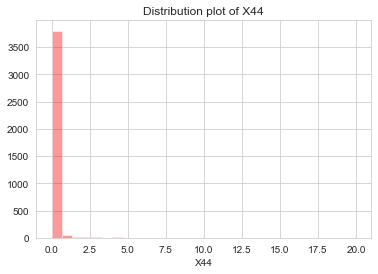

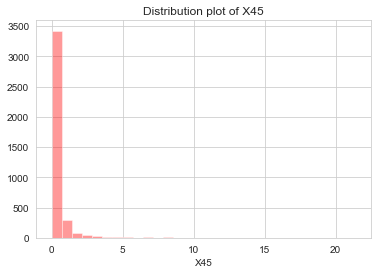

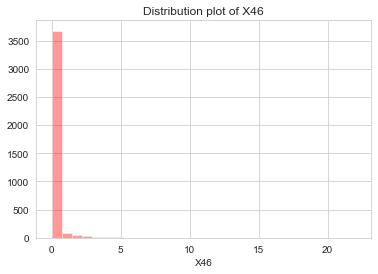

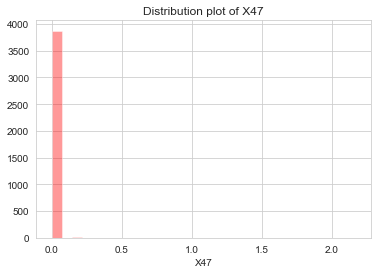

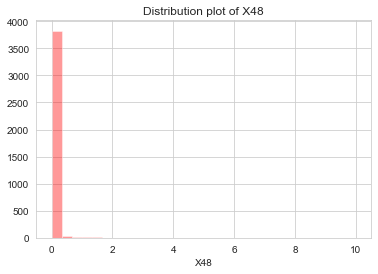

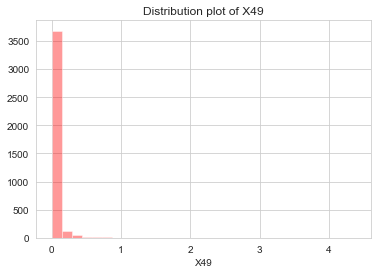

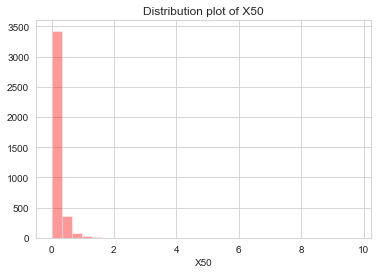

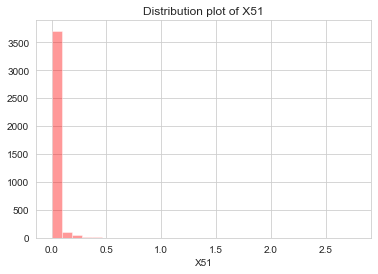

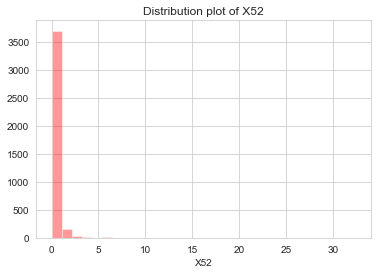

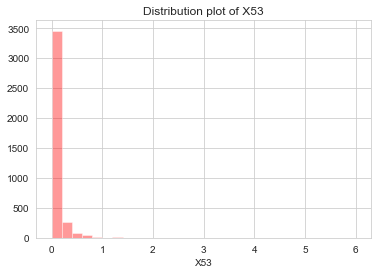

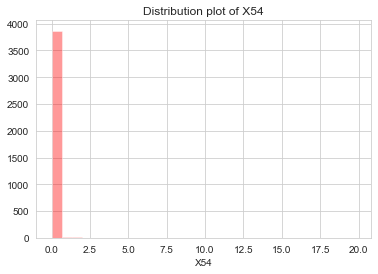

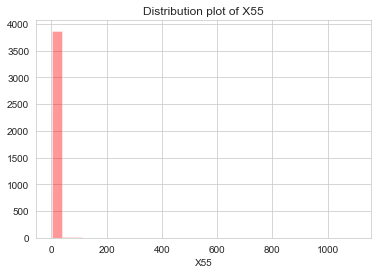

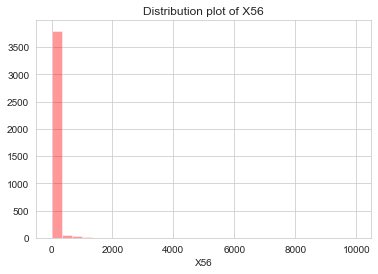

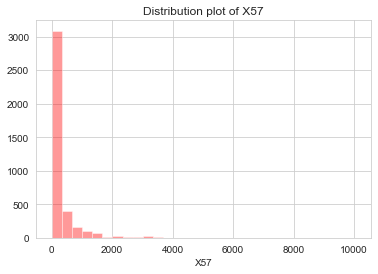

In [79]:
# Check distribution of data with respect to the each feature
#observation
##Most of the feature columns are right skewed we can feature transformation like log transforms and check distributions
for i in features:    
    sns.set_style('whitegrid')
    sns.distplot(df[i], kde = False, color ='red', bins = 30)
    plt.xlabel(i)
    plt.title('Distribution plot of '+ i)
    plt.show()

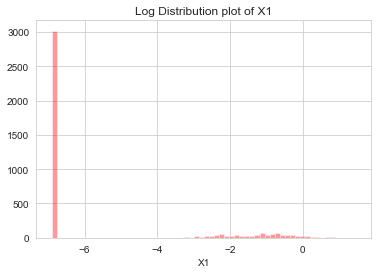

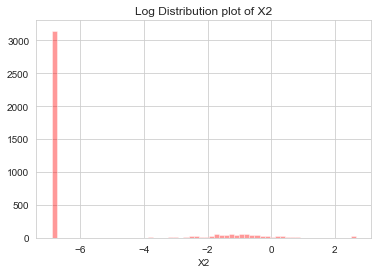

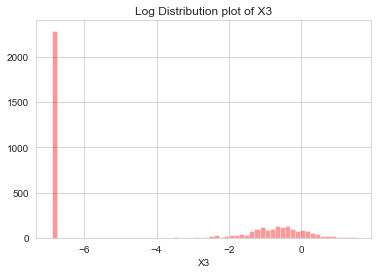

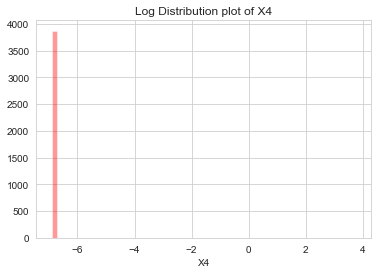

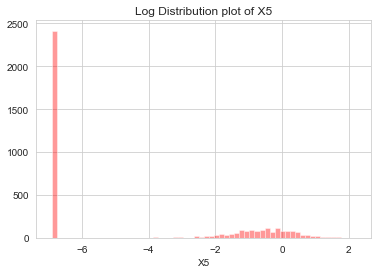

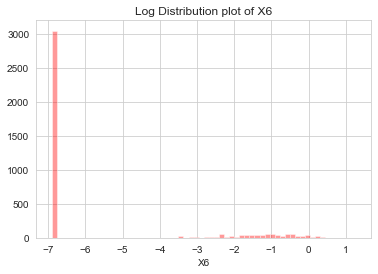

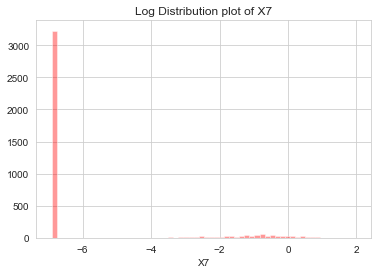

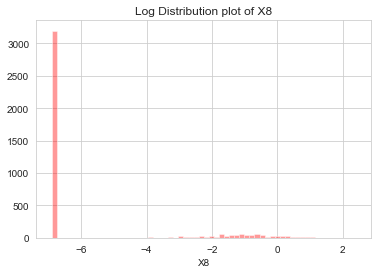

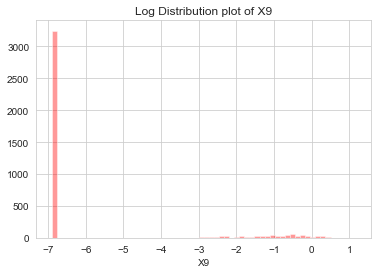

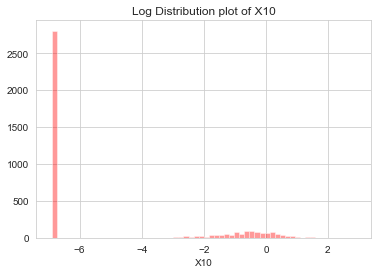

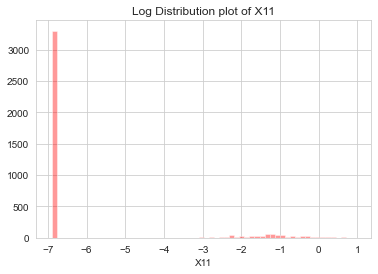

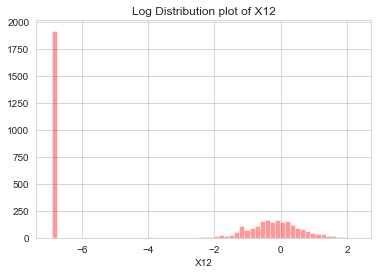

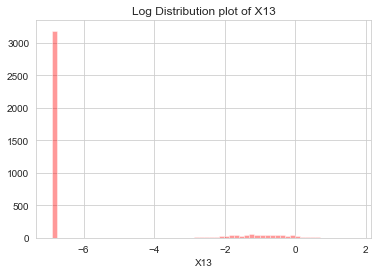

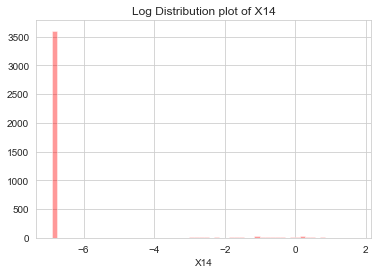

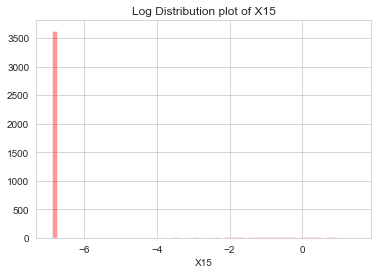

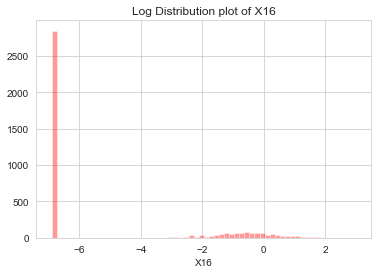

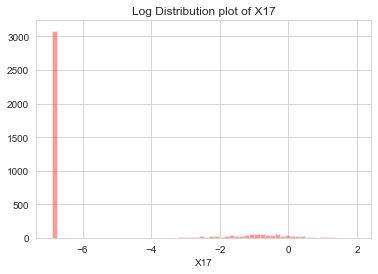

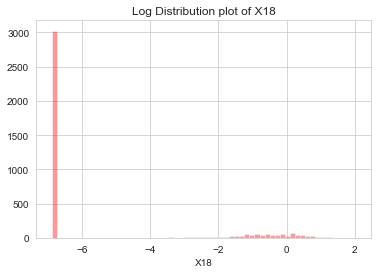

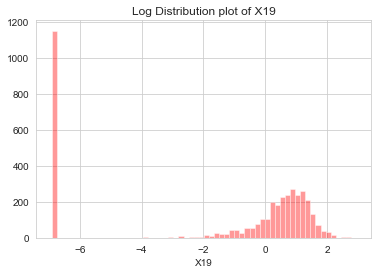

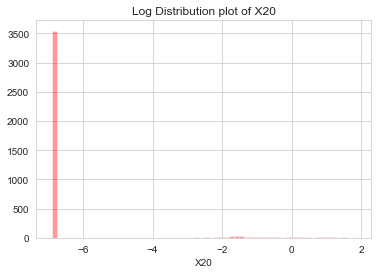

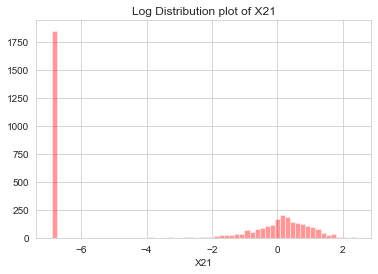

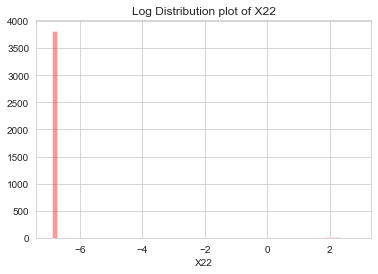

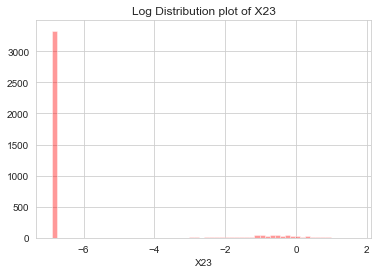

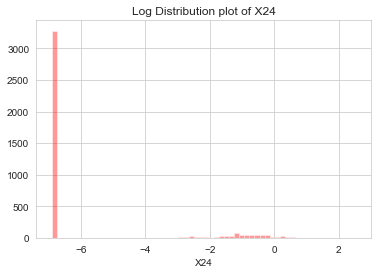

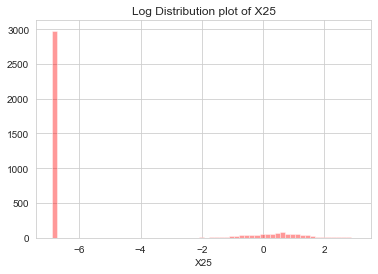

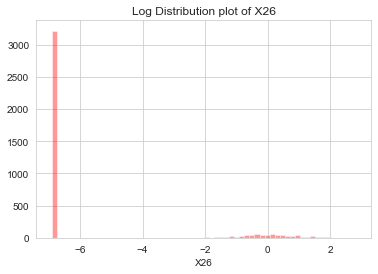

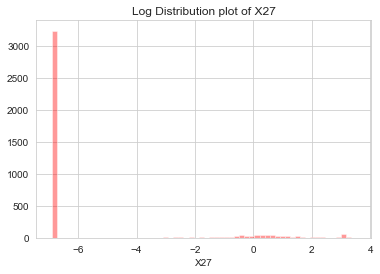

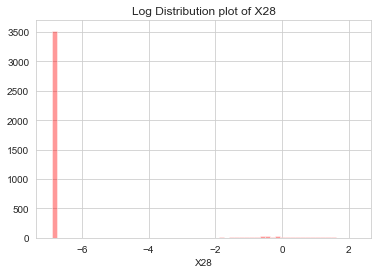

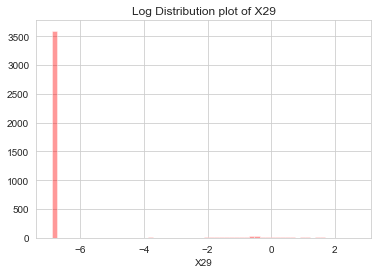

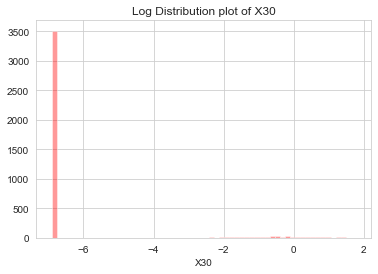

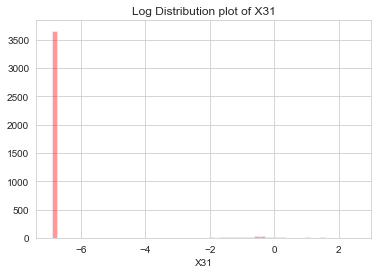

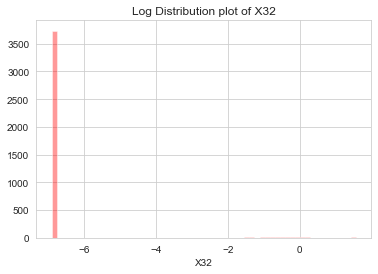

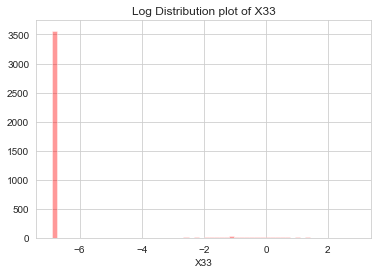

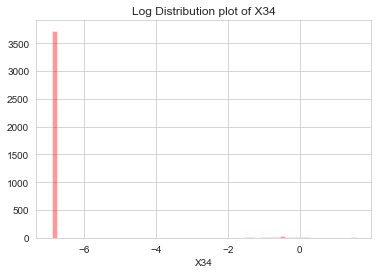

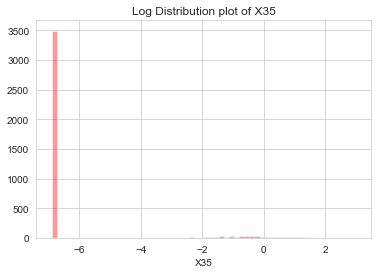

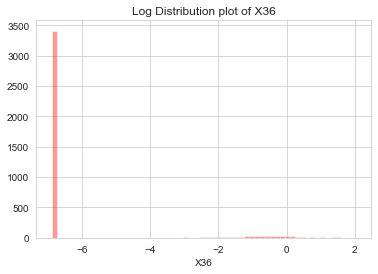

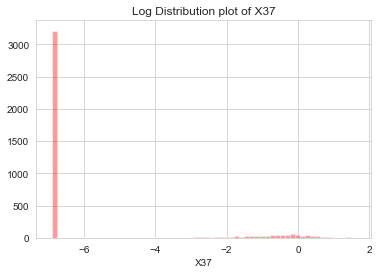

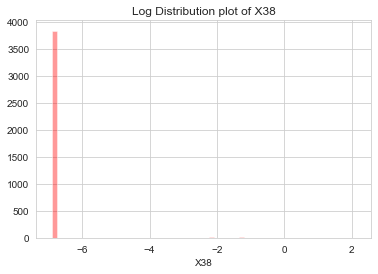

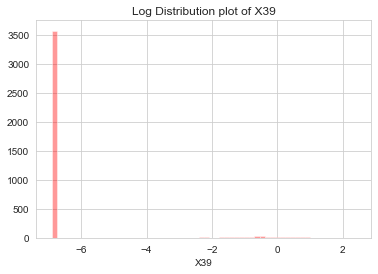

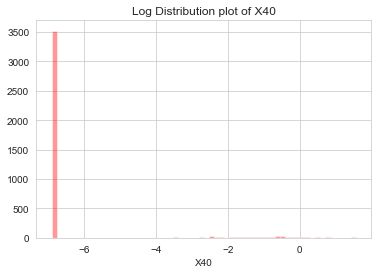

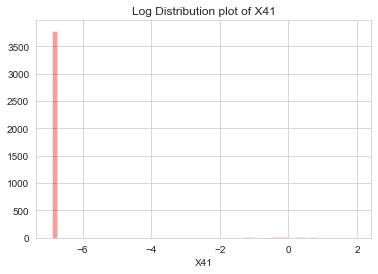

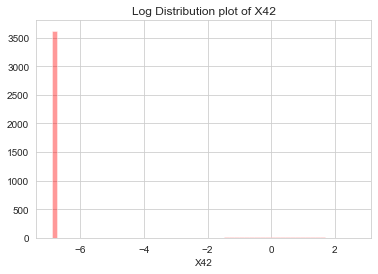

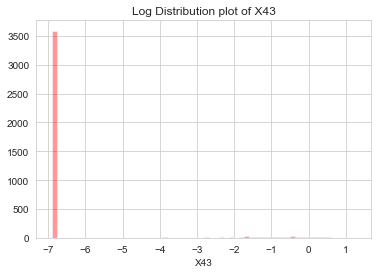

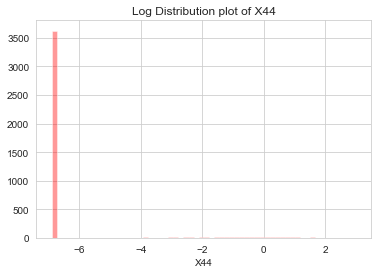

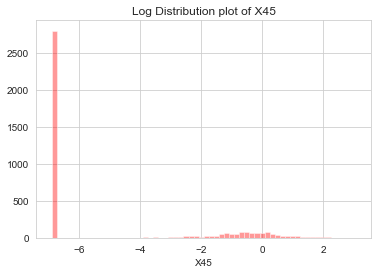

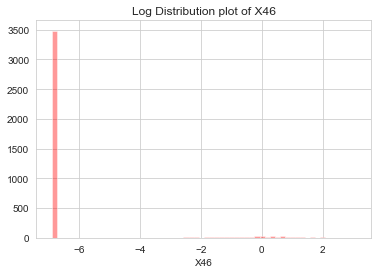

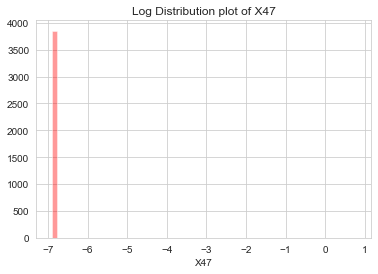

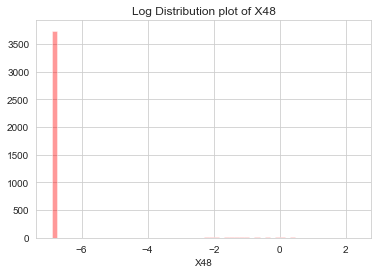

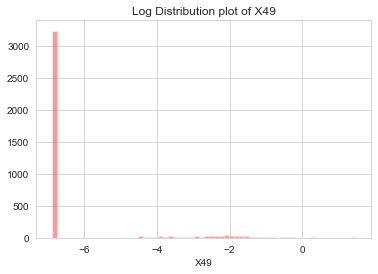

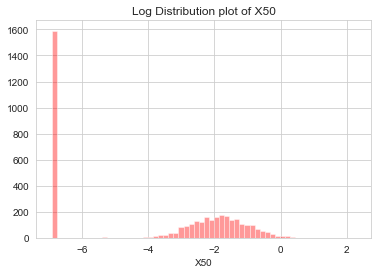

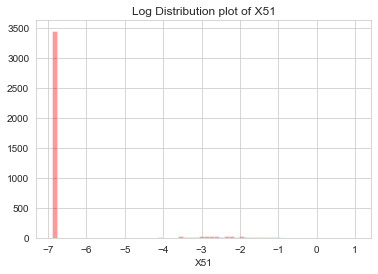

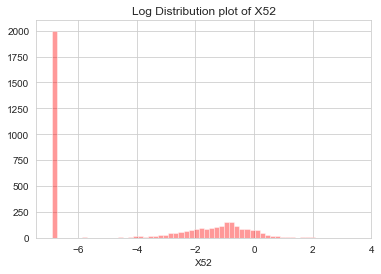

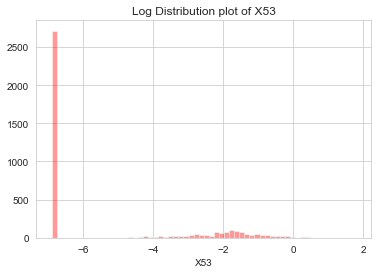

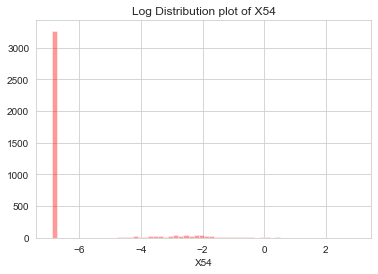

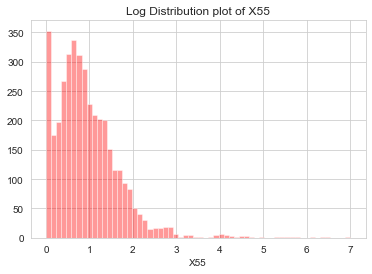

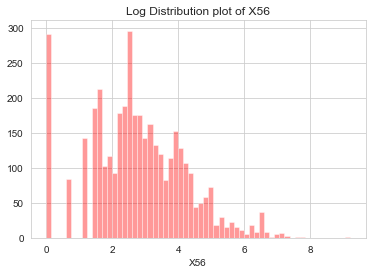

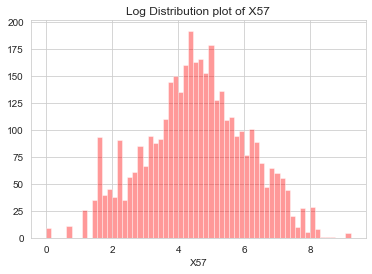

In [80]:
#log distribution of each feature
#observation-
# Check distribution of data with respect to the each feature
#since most of the values in a column are the same i.e. zero, there is no major impact on the skewness of each feature distribution 
#even after any transformation
for i in features:    
    sns.set_style('whitegrid')
    sns.distplot(np.log(df[i]+1e-3), kde = False, color ='red', bins = 60)
    plt.xlabel(i)
    plt.tit le('Log Distribution plot of '+ i)
    plt.show()

C:\Users\siddh\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\siddh\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\siddh\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


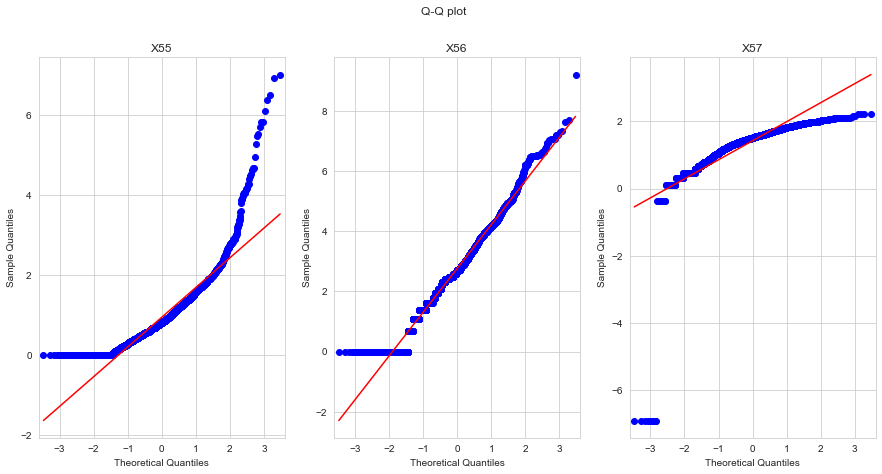

In [68]:
#check if the above log of feature values follow gaussian distribution
fig, axs = plt.subplots(1,3,figsize=(15,7))
fig.suptitle('Q-Q plot')

#q-q plot for log of X55 
sm.qqplot(np.log(df['X55']), line='s', ax=axs[0])
axs[0].set_title('X55')

#q-q plot for log of X56
sm.qqplot(np.log(df['X56']), line='s', ax=axs[1])
axs[1].set_title('X56')

#q-q plot for log of X57
sm.qqplot(np.log(df['X57']), line='s', ax=axs[2])
axs[2].set_title('X57')

pylab.show()

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


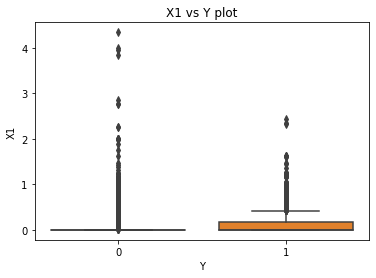

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


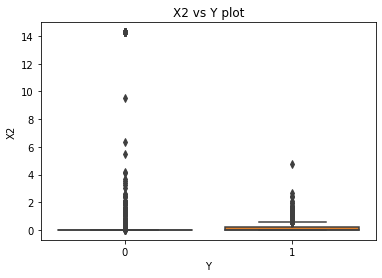

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


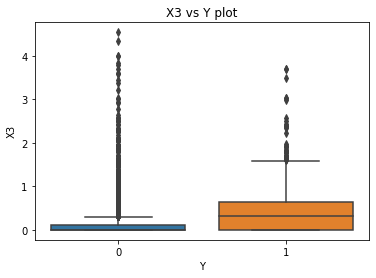

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


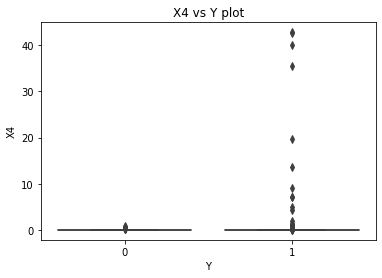

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


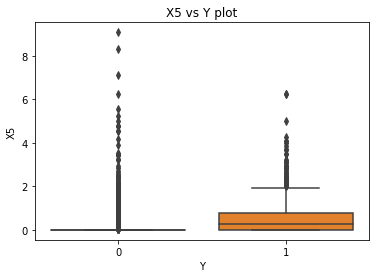

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


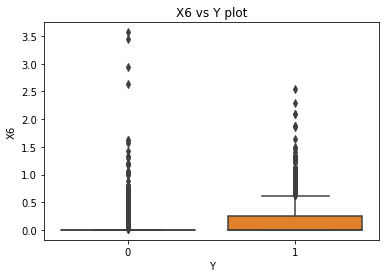

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


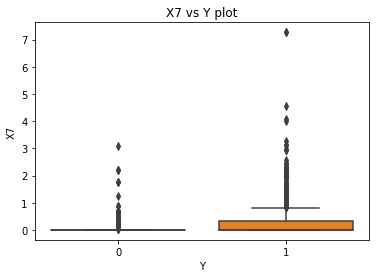

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


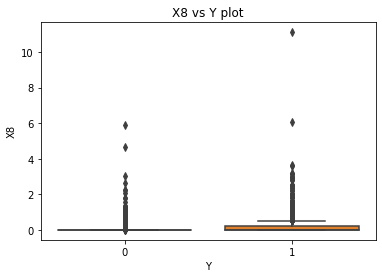

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


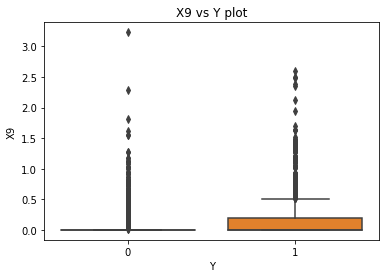

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


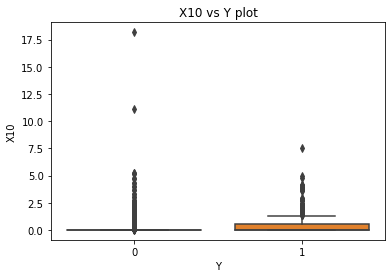

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


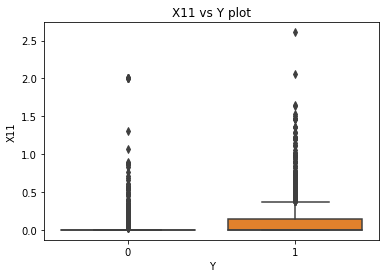

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


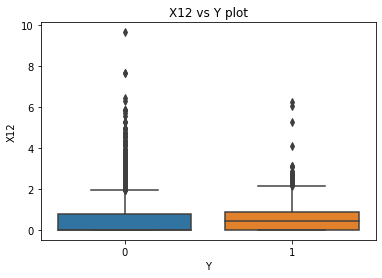

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


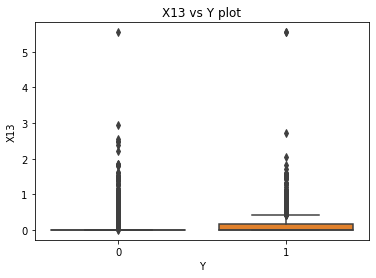

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


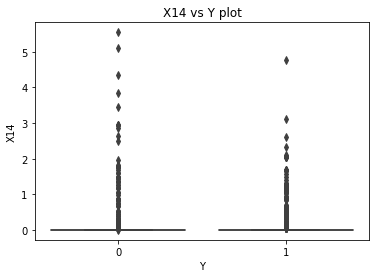

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


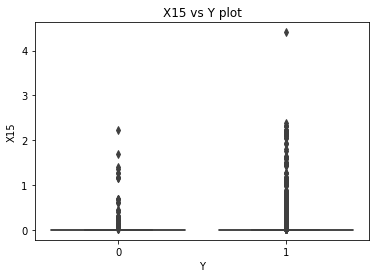

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


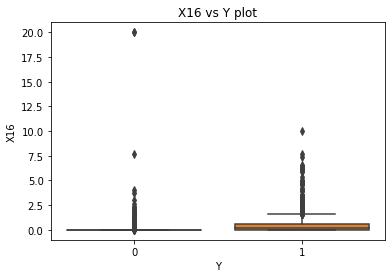

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


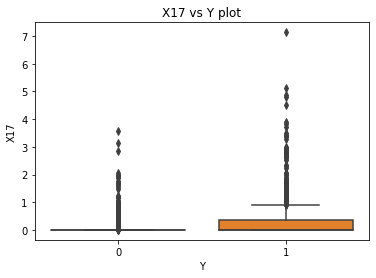

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


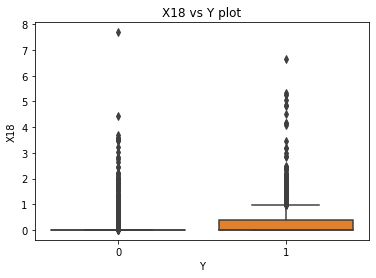

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


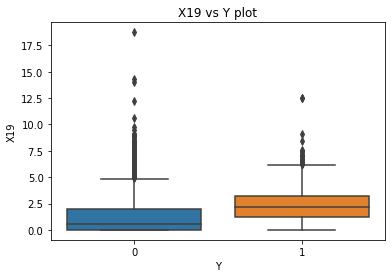

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


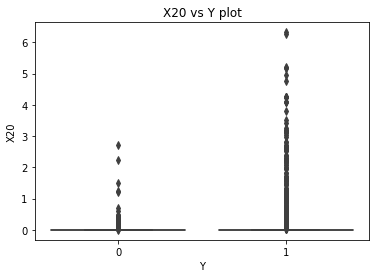

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


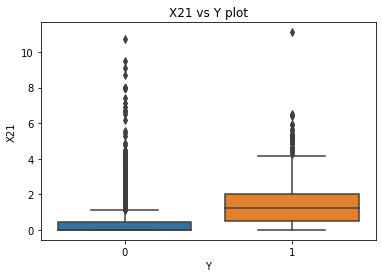

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


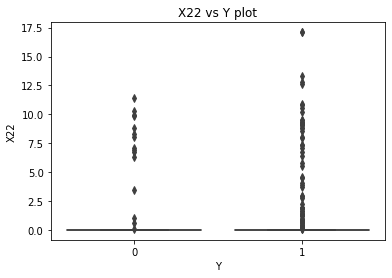

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


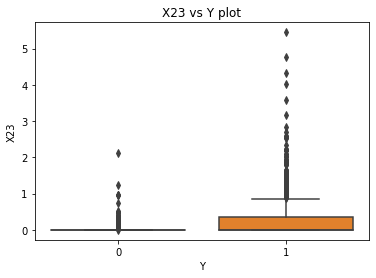

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


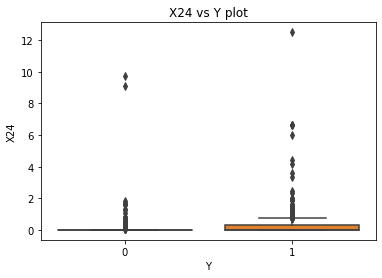

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


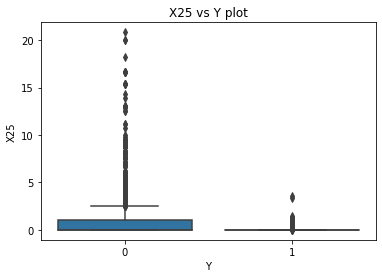

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


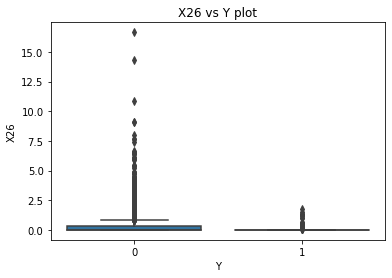

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


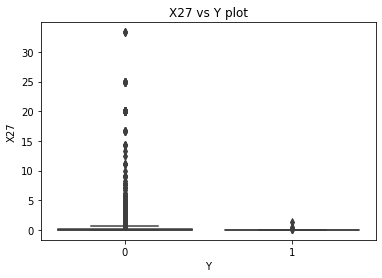

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


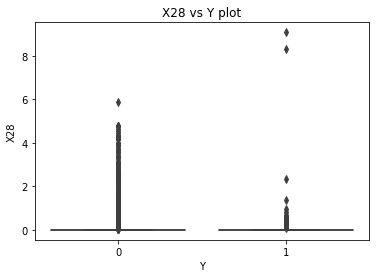

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


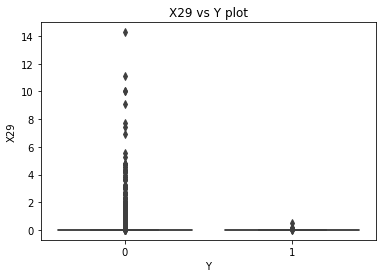

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


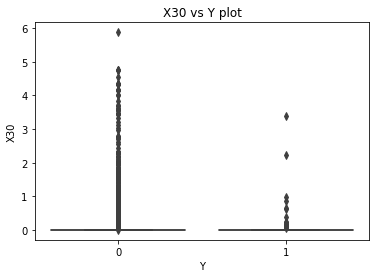

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


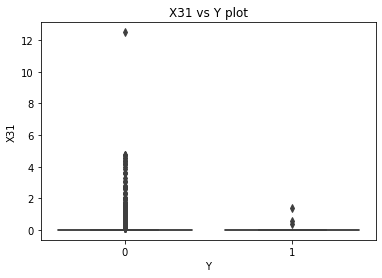

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


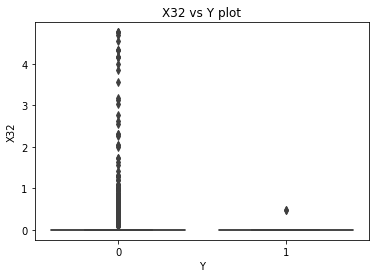

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


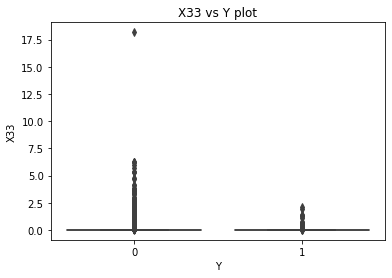

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


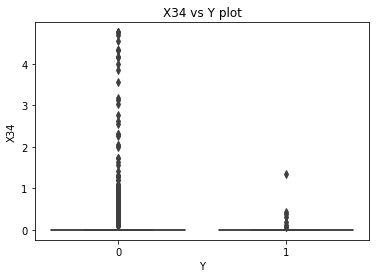

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


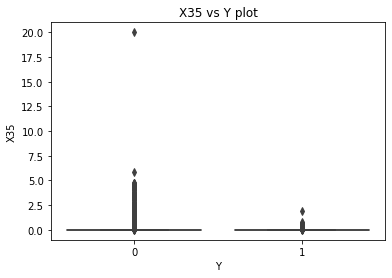

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


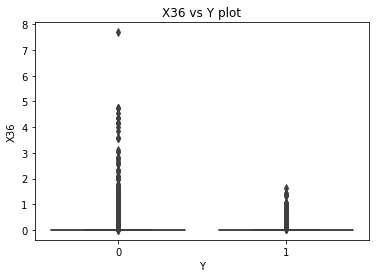

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


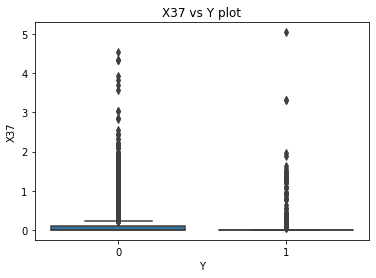

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


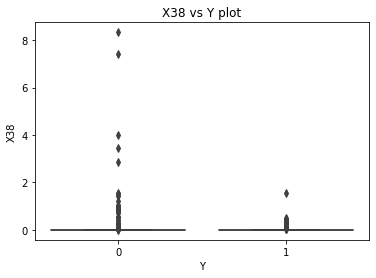

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


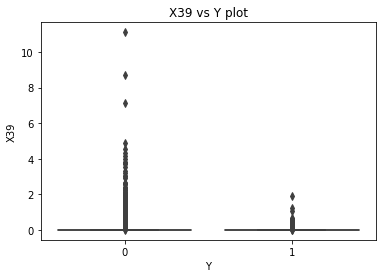

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


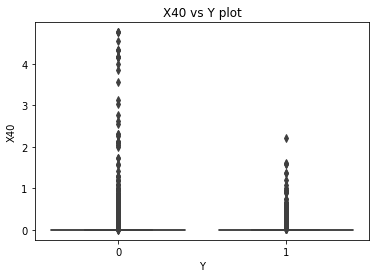

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


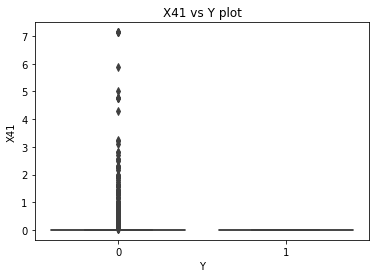

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


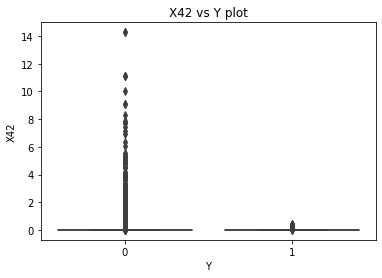

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


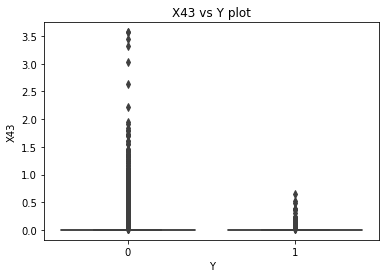

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


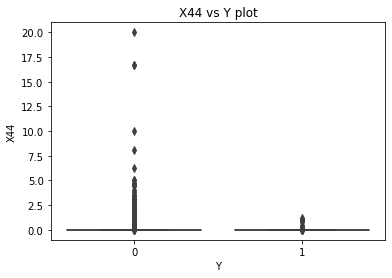

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


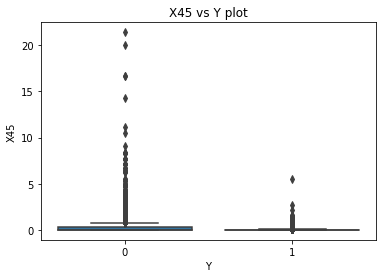

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


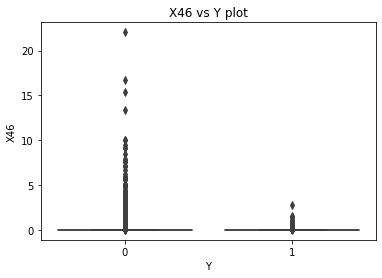

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


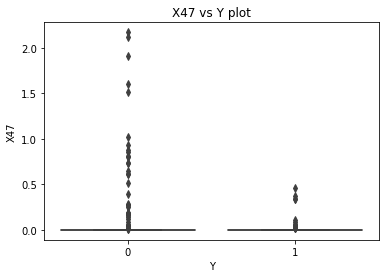

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


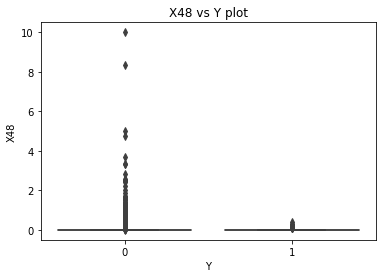

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


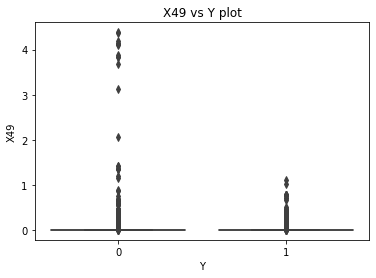

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


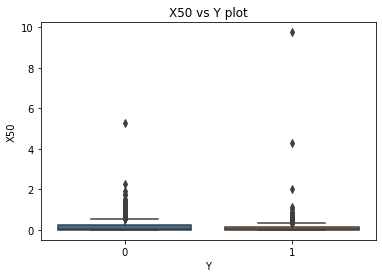

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


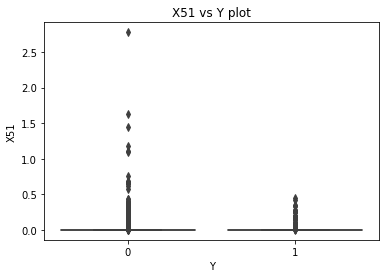

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


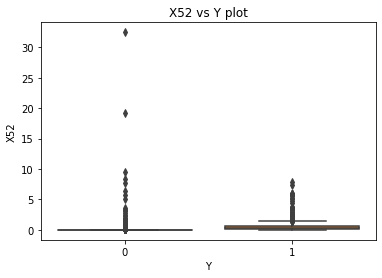

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


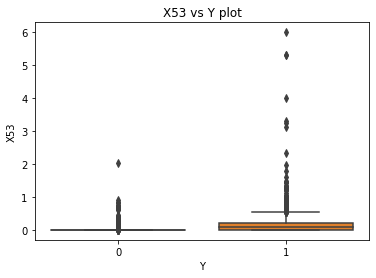

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


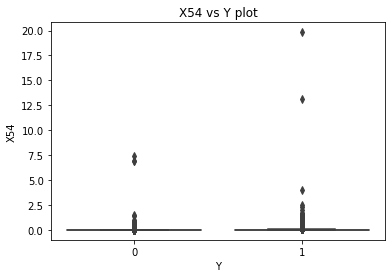

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


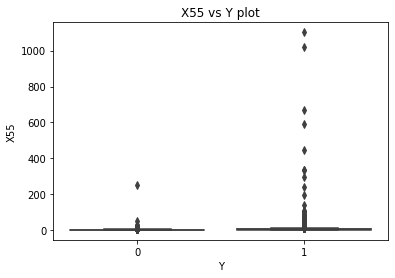

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


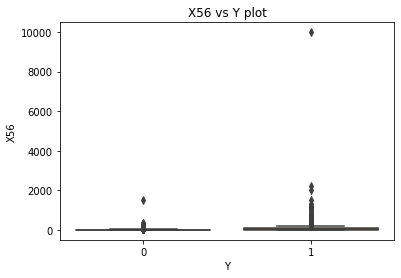

C:\Users\siddh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


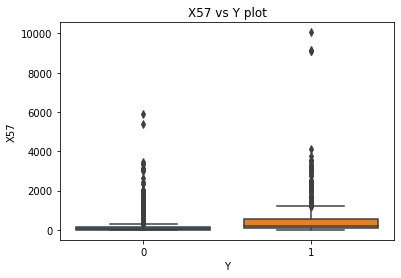

In [126]:
# Check distribution of data with respect to each feature corresponding to each class label
#most of the features have a very low range of values across them and there points lying outside the whiskers which can
#be marked as outliers
for i in features:
    sns.boxplot(df['Y'], df[i])
    plt.xlabel('Y')
    plt.ylabel(i)
    plt.title(i+' vs Y plot')
    plt.show()

In [5]:
#spearman correlation coeffecient between features and target variables
#features like X7, X55, X52, X53 have high correlation with the target which means that they might be important
#in determining the class labels

for i in features:
    corr, _ = spearmanr(df[i], df['Y'])
    print("Spearman's correlation between {} and Y is :{}".format(i, corr))

Spearman's correlation between X1 and Y is :0.24953697180864834
Spearman's correlation between X2 and Y is :0.30617440879539837
Spearman's correlation between X3 and Y is :0.3427042351595624
Spearman's correlation between X4 and Y is :0.09344292816543916
Spearman's correlation between X5 and Y is :0.4046743633270969
Spearman's correlation between X6 and Y is :0.3310498926252795
Spearman's correlation between X7 and Y is :0.5214599291146869
Spearman's correlation between X8 and Y is :0.36158469457479303
Spearman's correlation between X9 and Y is :0.31045832406172114
Spearman's correlation between X10 and Y is :0.3065451303356641
Spearman's correlation between X11 and Y is :0.36646708849701376
Spearman's correlation between X12 and Y is :0.15014035178327859
Spearman's correlation between X13 and Y is :0.21570682402542976
Spearman's correlation between X14 and Y is :0.16258880723117392
Spearman's correlation between X15 and Y is :0.2701486000063946
Spearman's correlation between X16 and Y

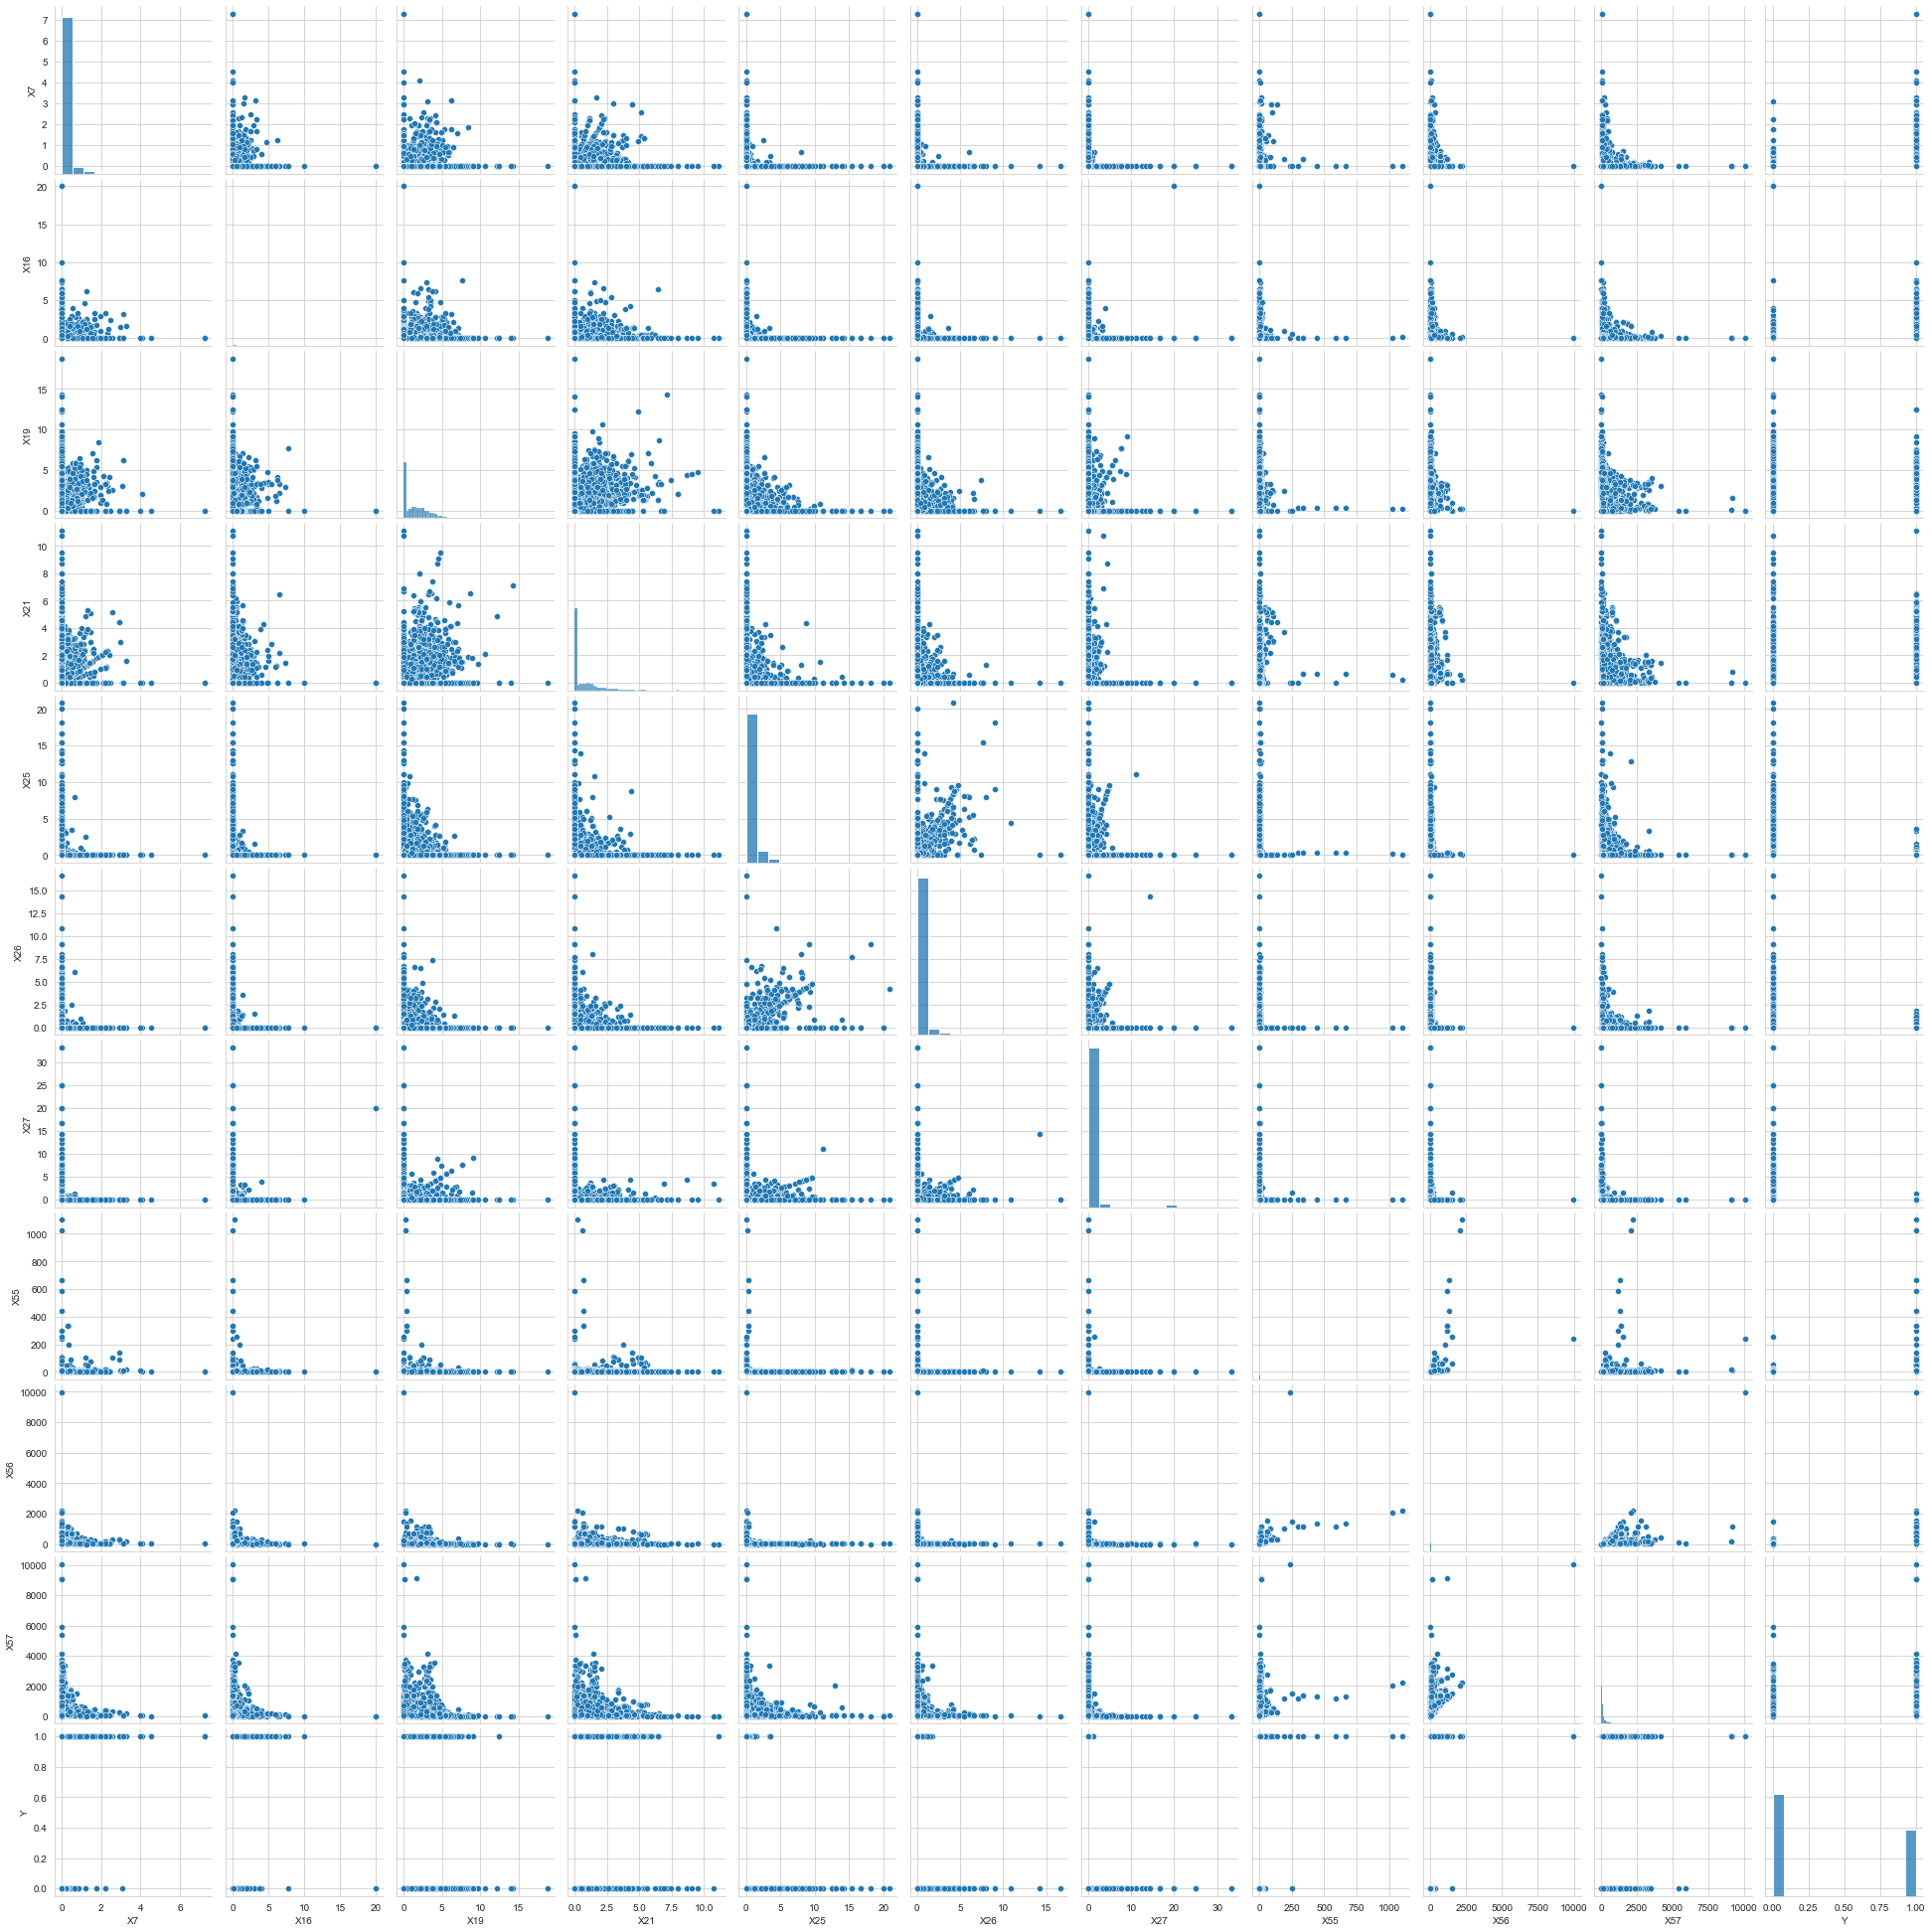

In [99]:
sns.pairplot(df[['X7', 'X16', 'X19', 'X21', 'X25', 'X26', 'X27', 'X53', 'X52' 'X55', 'X56', 'X57', 'Y']])

<AxesSubplot:>

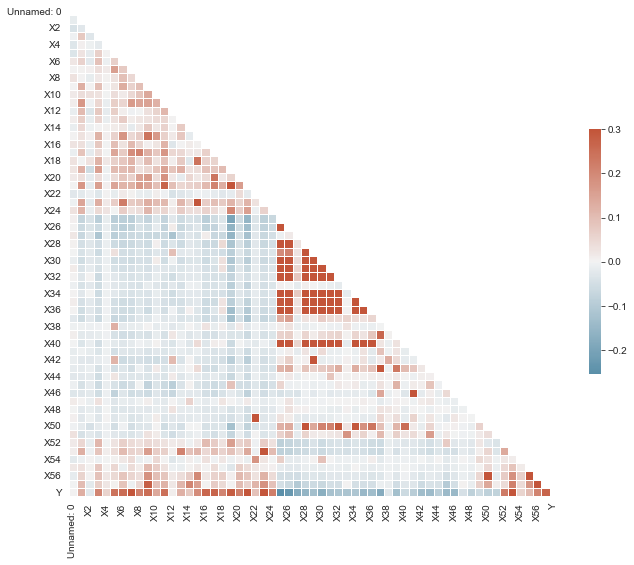

In [86]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

0    2376
1    1534
Name: Y, dtype: int64


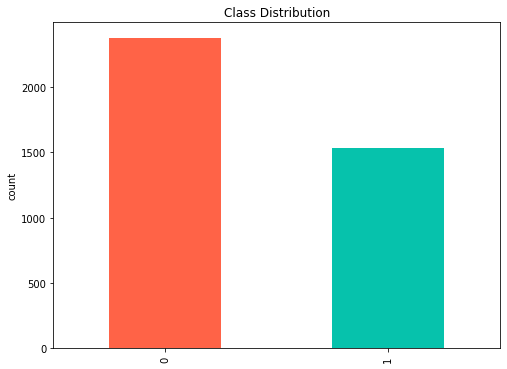

In [41]:
#Class distribution
#indrel_1mes
x = df['Y'].value_counts()
print(x)
colors = ['#FF6347', '#06C2AC']
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
x.plot(kind='bar',
       title = 'Class Distribution',
       ylabel='count',
       color = colors,
       ax=ax)
plt.show()

<h2>Feature selection using chi2 test</h2>

In [72]:
#select top features using chi2 test
select_kbest = SelectKBest(score_func=chi2)
#fit the data
most_imp_bigram = select_kbest.fit(df[features], class_label)
#get feature names of top selected features
selected_features = select_kbest.get_feature_names_out()
df_final = df[list(selected_features)]
df_final.head()

,X7,X16,X19,X21,X25,X26,X27,X55,X56,X57
0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1.200,2,12
1,2.25,0.00,3.38,1.12,0.0,0.0,0.0,16.304,148,375
2,0.00,0.00,8.10,0.00,0.0,0.0,0.0,1.000,1,5
3,0.00,1.29,1.93,2.58,0.0,0.0,0.0,2.440,22,122
4,0.58,0.58,0.58,1.74,0.0,0.0,0.0,3.338,123,207


In [73]:
#since the data is right skewed hence applying log transform to selected features 
for i in list(selected_features):
    df_final[i]  = np.log(df_final[i]+1e-3)

<ipython-input-73-5518bc454034>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[i]  = np.log(df_final[i]+1e-3)


In [74]:
#split the data into train and validation data
X = df_final
Y = class_label
X_train, X_val, y_train, y_val =  train_test_split(X, Y, test_size = 0.2, random_state = 20)

<h2>Feature selection using forward feature selection</h2>

In [108]:
from sklearn.calibration  import CalibratedClassifierCV

In [109]:
clf = Ridge(alpha=1.0)
sfs_forward = SequentialFeatureSelector(
    clf, n_features_to_select=0.6, direction="forward").fit(df[features], df['Y'])

#get top selected features  
sfs_forward.get_feature_names_out()
df_final = df[list(sfs_forward.get_feature_names_out())]

In [110]:
#since the data is right swewed hence applying log transform to selected features
for i in sfs_forward.get_feature_names_out():
    df_final[i]  = np.log(df_final[i]+1e-3)

<ipython-input-110-1b0dcb43bf6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[i]  = np.log(df_final[i]+1e-3)


In [111]:
df_final.head()

,X3,X4,X5,X6,X7,X8,X9,X12,X16,X17,...,X43,X44,X45,X46,X47,X48,X49,X52,X53,X57
0,1.468105,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,...,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,0.294906,-6.907755,2.484990
1,-0.578034,-6.907755,0.114221,-0.578034,0.811375,-6.907755,-6.907755,-0.578034,-6.907755,-6.907755,...,-6.907755,-6.907755,-0.578034,-6.907755,-6.907755,-6.907755,-6.907755,-0.685179,-6.907755,5.926929
2,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,...,-6.907755,-6.907755,0.993622,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,1.609638
3,-0.444726,-6.907755,0.658038,-6.907755,-6.907755,-6.907755,-6.907755,0.255417,0.255417,-0.444726,...,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-0.770028,-0.991553,4.804029
4,-6.907755,3.568434,-0.543005,-6.907755,-0.543005,-0.543005,-6.907755,-6.907755,-0.543005,-0.543005,...,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-1.427116,-1.427116,5.332724
